# Dynamic Programming is nothing but cached recursion

Objective of this notebook: compare the performance of
- a **basic (vanilla) recursion**
- a and **cached recursion**

Using Fibonacci example
- `fibo(0)` `=` `fibo(1)` `=` `0`
- `fibo(n)` `=` `fibo(n-1)` `+` `fibo(n-2)`
- hence `fibo_series` `=` `[` `0` `,` `1` `,` `1` `,` `2` `,` `3` `,` `5` `,` `8` `,` `13` `,` `...` `]`

Criteria for comparison:
- **Count of recursion calls**
- **Execution timing**

In [1]:
def fibo_vanilla_recursive(i):
    if i <= 0:
        return 0
    elif i == 1:
        return 1
    else:
        return fibo_vanilla_recursive(i-1) + fibo_vanilla_recursive(i-2)

%timeit for _ in range(10): fibo_vanilla_recursive(10)

217 µs ± 5.03 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [2]:
cache = {0:0, 1:1}
def fibo_cached_recursive(i):
    if cache.get(i) is not None:
        return cache[i]
    else:
        res = fibo_cached_recursive(i-1) + fibo_cached_recursive(i-2)
        cache[i] = res
        return res

%timeit for _ in range(10): fibo_cached_recursive(10)

2.06 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Let's counter **how many times** `fibo_vanilla_recursive()` is called when computing a series of `fibo_vanilla_recursive(i)` (`i in range(10)`)

In [3]:
seen = []
counter = 0

def fibo_vanilla_recursive(i):
    seen.append(i)
    # print("  computing fibo({})".format(i))
    global counter
    counter += 1
    if i <= 0:
        return 0
    elif i == 1:
        return 1
    else:
        return fibo_vanilla_recursive(i-1) + fibo_vanilla_recursive(i-2)

In [4]:
mega_counter = 0
res_recursive = []
for i in range(10):
    global counter
    counter = 0
    res_recursive.append(fibo_vanilla_recursive(i))
    mega_counter += counter
    print("for i = {}, counter = {}".format(i, counter))  # to comment when timing

print("total_counter = [{}]".format(mega_counter))

for i = 0, counter = 1
for i = 1, counter = 1
for i = 2, counter = 3
for i = 3, counter = 5
for i = 4, counter = 9
for i = 5, counter = 15
for i = 6, counter = 25
for i = 7, counter = 41
for i = 8, counter = 67
for i = 9, counter = 109
total_counter = [276]


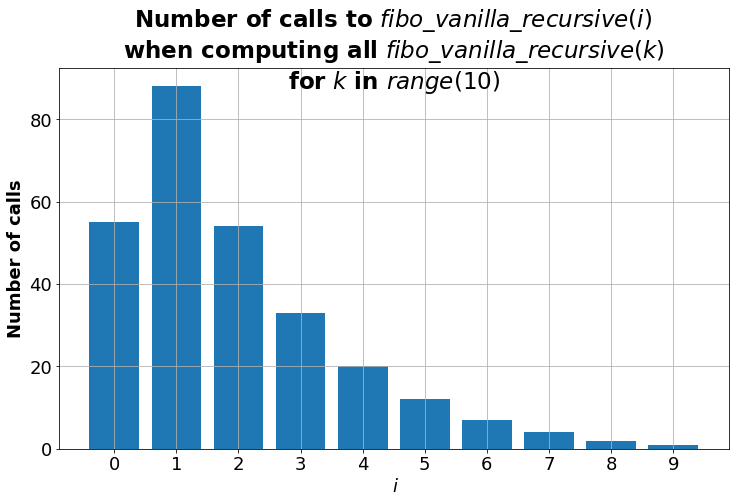

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111)

labels, values = zip(*Counter(seen).items())
# print(labels, values)
indexes = np.arange(len(labels))
width = 0.8
plt.bar(indexes, values, width)

plt.grid()
plt.xticks(fontsize=18)
plt.xticks(np.arange(min(seen), max(seen)+1, 1.0))
plt.yticks(fontsize=18)
plt.xlabel(r'$\ i$', fontsize=18, fontweight='bold')
plt.ylabel("Number of calls", fontsize=18, fontweight='bold')
plt.title("Number of calls to{} \nwhen computing all{}\nfor{} in {}".format(r'$\ fibo\_vanilla\_recursive(i)$', r'$\ fibo\_vanilla\_recursive(k)$', r'$\ k$', r'$range(10)$'), fontsize=23,  fontweight='bold', y=0.93)
fig.savefig('docs/number_calls_fibo_recursive.svg', format='svg', dpi=1500)

## Bonus digression

The plot shows that `fibo_vanilla_recursive(1)` is called `88` times when computing `[` `fibo_vanilla_recursive(0)` `...` `fibo_vanilla_recursive(9)` `]`

Could we have analytically computed that result?

Let's call `nb_one(k)` the number of calls to `fibo_vanilla_recursive(1)` when involking `fibo_vanilla_recursive(k)`

_Initialisation:_
- `nb_one(0)` `=` `0`
- `nb_one(1)` `=` `1`

_Recursion:_
- `nb_one(k+2)` `=` `nb_one(k+1)` `+` `nb_one(k)`

Hence:
`nb_one(k)` `=` `fibonacci(k)`

In [6]:
res = 0
for i in range(10):
    res += fibo_cached_recursive(i)
print(res)

88
